In [113]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\causb1a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\causb1a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\causb1a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv("C:/Users/causb1a/Desktop/smart.csv")

In [125]:
def event_label_cleaner(text):
        """
        cleans the search bar column, where customers have searched. This makes it lowercase and gets rid of stop words,
        punctuation etc. to get it ready for processing
        :param text: the input to be cleaned (string)
        :return: returns a cleaned string output via some processing as above stated.
        """
        text = re.sub('[^a-zA-Z]', ' ', str(text))
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = text.lower()
        text = text.split()
        lem = WordNetLemmatizer()
        stop_words = set(stopwords.words("english"))
        text = [lem.lemmatize(word) for word in text if not word in stop_words]
        text = " ".join(text)
        return text

def event_label_cleaner_to_df(df, column):
    df['clean'] = df[column].apply(lambda x: event_label_cleaner(x))
    return df

In [126]:
df3=df2.drop(columns = ['Network ID', 'Start Date (UTC)', 'Submit Date (UTC)', '#', 'Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.'])
df3.columns

Index(['On a scale of 1 -10 (10 being great), how do you feel about your work today?',
       'On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?',
       'On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?',
       'Are you confident in the objectives you have been set for the year?',
       'If not, what would help you to achieve them?',
       'Are you clear on roles and responsibilities across Data and CRM?',
       'If not, what can we do to help make things clearer?',
       'We know that simplicity in the way we work is really important. Please share any ideas you have for things you think would make a material difference and what’s needed to make them happen.',
       'Email', 'All team meets', 'Team meetings', 'Newsletter', 'clean'],
      dtype='object')

In [143]:
df2 = event_label_cleaner_to_df(df2, 'If not, what would help you to achieve them?')

In [144]:
def get_n_gram_df(n_gram_min, n_gram_max, df):
    """
    This function creates a dataframe that counts the number of words that exist. n_gram means number of words in
    combination, for example a bigram means a phrase of 2 words. This function counts how many times that phrase for
    example exists in the specified column of the dataframe. In this case, the clean column after the df has been
    cleaned
    :param n_gram: An integer number of n_gram
    :param call_no_call_df: dataframe with the column search bar to count
    :return: returns a dataframe with a count of each word/phrase
    """
    if df['clean'].empty:
        return pd.DataFrame(columns = ['counts', 'name'])
    vectorizer = CountVectorizer(ngram_range=(n_gram_min, n_gram_max))
    matrix = vectorizer.fit_transform(df.clean)
    words = list(vectorizer.get_feature_names())
    sum_counts = matrix.toarray().sum(axis=0)
    return pd.DataFrame(data={'counts': sum_counts, 'name': words}).sort_values(by='counts', ascending=False)

In [145]:
get_n_gram_df(1, 1, df2).head(7)

,counts,name
54,9,nan
89,6,time
57,5,objective
75,5,resource
88,5,team
55,4,need
16,3,confident


In [149]:
df2 = event_label_cleaner_to_df(df2, 'Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.')

In [152]:
get_n_gram_df(2, 2, df2).head(20)

,counts,name
49,3,data lake
233,2,would good
71,2,experience role
0,1,account live
158,1,put focus
162,1,question think
161,1,question many
160,1,quality work
159,1,put tracking
157,1,project planning


In [1]:
import pandas as pd

C:\Users\causb1a\AppData\Roaming\Python\Python36\site-packages\pandas\compat\_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [114]:
df2 = pd.read_csv('C:/Users/causb1a/Documents/Data-CRM-responses.csv')

In [30]:
df2

,#,"On a scale of 1 -10 (10 being great), how do you feel about your work today?","On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?","On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?",Are you confident in the objectives you have been set for the year?,"If not, what would help you to achieve them?",Are you clear on roles and responsibilities across Data and CRM?,"If not, what can we do to help make things clearer?",We know that simplicity in the way we work is really important. Please share any ideas you have for things you think would make a material difference and what’s needed to make them happen.,Email,All team meets,Team meetings,Newsletter,Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.,Start Date (UTC),Submit Date (UTC),Network ID
0,236khlpmdr4vve236khlp3m63oz0oi7o,6,7,3.0,Somewhat confident,My role has changed substantially in the last ...,A little clear,All Teams Call format is tired and seems to re...,Create bandwidth for value add. Improve retent...,NaN,All team meets,Team meetings,NaN,Salary alignment cross teams. Experience in ro...,2022-05-23 13:07:21,2022-05-23 14:38:24,c154d42d27
1,5maz44h0olmtspqbm5maz0af7uccndal,7,7,8.0,Very confident,More resources!,Very clear,"I am clear, thank you",NaN,NaN,All team meets,NaN,NaN,NaN,2022-05-19 19:12:34,2022-05-19 19:14:29,9373d713b5
2,sp7b5e7icmjb4dgz81sp7b5q6l1z2gw1,6,10,5.0,Very confident,NaN,Very clear,NaN,Being able to communicate with the rest of the...,Email,NaN,NaN,Newsletter,'- Focus on *detailed* long-term strategic pro...,2022-05-19 17:28:17,2022-05-19 18:14:23,a335be6b96
3,nt5itenant36fs9qfnt5icworcqcpnmn,8,7,7.0,A little confident,I am confident,Very clear,I am clear,Resurrecting the data engineering guild,Email,All team meets,NaN,NaN,More cross pollination between teams - especia...,2022-05-19 16:03:39,2022-05-19 16:11:58,6e8293560c
4,1f9gc3hudk3bt93ihz97x7d1f9gc4lr2,10,10,10.0,Very confident,.,Very clear,People from the different teams going to sub t...,Make CAZ work or get a better solution,NaN,All team meets,Team meetings,NaN,.,2022-05-19 15:57:05,2022-05-19 15:59:15,0a76223934
5,tq201hpuqenvm57xjtq201hd9cs0b78w,7,7,4.0,A little confident,More resource,Somewhat clear,Martin to share them again,Clear project plans for everything with milest...,NaN,All team meets,NaN,Newsletter,Full team MS Teams channel,2022-05-19 15:47:33,2022-05-19 15:49:06,ff788e7a0e
6,8ybwfqih2a4s3p0b32e58ybwfqign6cx,9,10,10.0,Somewhat confident,"Re-inforcing/reminders in team calls, etc, of ...",Somewhat clear,Increasing understanding across team of how lo...,Simple diagramatical view of how the teams int...,Email,All team meets,Team meetings,NaN,Same vision across the team on top priorities ...,2022-05-19 11:48:38,2022-05-19 12:02:20,fd66dc09cf
7,34j45ptazjcd034kw0djbaa9amcrupkb,8,7,7.0,Somewhat confident,.,Very clear,.,There are too many tools helping us doing the ...,Email,All team meets,Team meetings,NaN,.,2022-05-19 10:13:45,2022-05-19 10:19:45,5f9f892cbc
8,zxwisb4ln65iax44gpzxw6rp88g2b0xn,8,8,7.0,Somewhat confident,NaN,Somewhat clear,NaN,NaN,NaN,All team meets,Team meetings,NaN,NaN,2022-05-19 09:45:28,2022-05-19 09:48:01,85702f44a4
9,mw7ym0yufo0uyj3wwnymw7ymswydilo0,8,8,4.0,Somewhat confident,NaN,Somewhat clear,NaN,NaN,NaN,NaN,NaN,Newsletter,NaN,2022-05-19 09:39:35,2022-05-19 09:41:03,0a76223934


In [57]:
import seaborn as sns

In [ ]:
px.histogram(df2, x="On a scale of 1 -10 (10 being great), how do you feel about your work today?") should do it

In [79]:
df3=df2.drop(columns = ['Network ID', 'Start Date (UTC)', 'Submit Date (UTC)', '#', 'Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.'])
df3.columns

Index(['On a scale of 1 -10 (10 being great), how do you feel about your work today?',
       'On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?',
       'On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?',
       'Are you confident in the objectives you have been set for the year?',
       'If not, what would help you to achieve them?',
       'Are you clear on roles and responsibilities across Data and CRM?',
       'If not, what can we do to help make things clearer?',
       'We know that simplicity in the way we work is really important. Please share any ideas you have for things you think would make a material difference and what’s needed to make them happen.',
       'Email', 'All team meets', 'Team meetings', 'Newsletter'],
      dtype='object')

In [80]:
df2.drop(columns=['Network ID', 'Start Date (UTC)', 'Submit Date (UTC)', '#', 'Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.']).columns

Index(['On a scale of 1 -10 (10 being great), how do you feel about your work today?',
       'On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?',
       'On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?',
       'Are you confident in the objectives you have been set for the year?',
       'If not, what would help you to achieve them?',
       'Are you clear on roles and responsibilities across Data and CRM?',
       'If not, what can we do to help make things clearer?',
       'We know that simplicity in the way we work is really important. Please share any ideas you have for things you think would make a material difference and what’s needed to make them happen.',
       'Email', 'All team meets', 'Team meetings', 'Newsletter'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

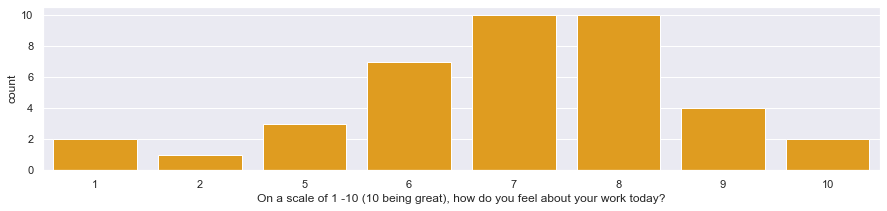

In [112]:
sns.set(rc={'figure.figsize':(15,3)})
ax = sns.countplot(x='On a scale of 1 -10 (10 being great), how do you feel about your work today?', data=df2, palette=['orange'])
abs_values = df2['On a scale of 1 -10 (10 being great), how do you feel about your work today?'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

<AxesSubplot:xlabel='On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?', ylabel='count'>

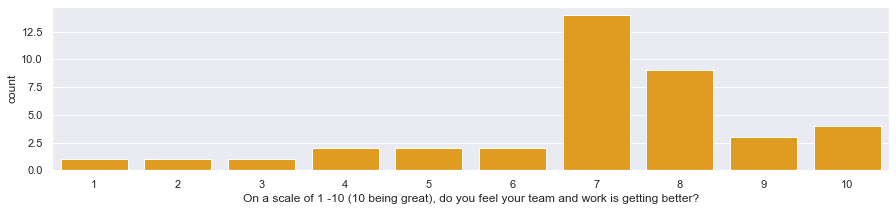

In [106]:
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?', data=df2, palette=['orange'])

<AxesSubplot:xlabel='On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?', ylabel='count'>

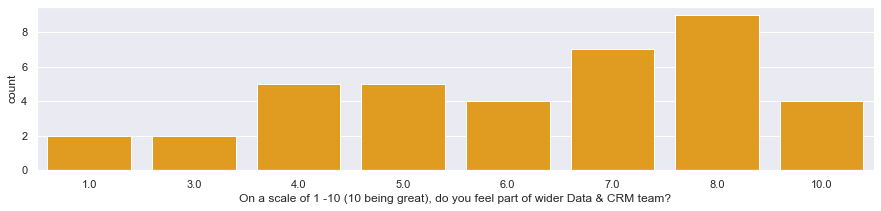

In [107]:
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?', data=df2, palette=['orange'])

<AxesSubplot:xlabel='Are you confident in the objectives you have been set for the year?', ylabel='count'>

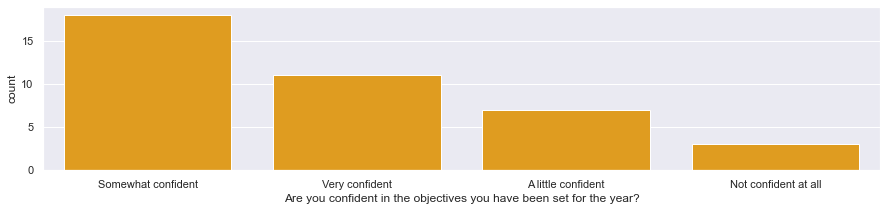

In [108]:
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='Are you confident in the objectives you have been set for the year?', data=df2, palette=['orange'])

<AxesSubplot:xlabel='Are you clear on roles and responsibilities across Data and CRM?', ylabel='count'>

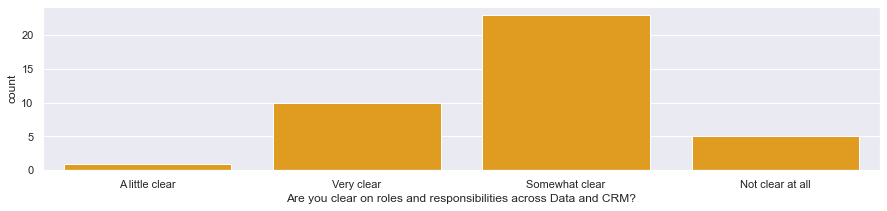

In [109]:
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='Are you clear on roles and responsibilities across Data and CRM?', data=df2, palette=['orange'])

<AxesSubplot:xlabel='Are you confident in the objectives you have been set for the year?', ylabel='count'>

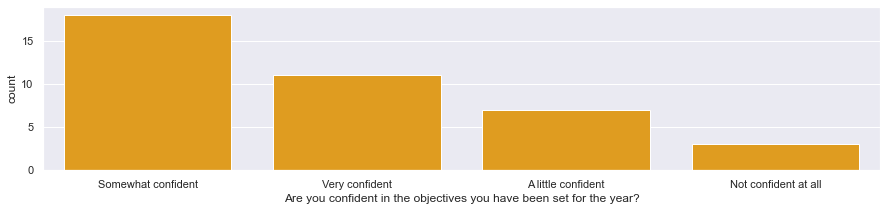

In [110]:
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='Are you confident in the objectives you have been set for the year?', data=df2, palette=['orange'])

In [83]:
df2

,#,"On a scale of 1 -10 (10 being great), how do you feel about your work today?","On a scale of 1 -10 (10 being great), do you feel your team and work is getting better?","On a scale of 1 -10 (10 being great), do you feel part of wider Data & CRM team?",Are you confident in the objectives you have been set for the year?,"If not, what would help you to achieve them?",Are you clear on roles and responsibilities across Data and CRM?,"If not, what can we do to help make things clearer?",We know that simplicity in the way we work is really important. Please share any ideas you have for things you think would make a material difference and what’s needed to make them happen.,Email,All team meets,Team meetings,Newsletter,Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.,Start Date (UTC),Submit Date (UTC),Network ID
0,236khlpmdr4vve236khlp3m63oz0oi7o,6,7,3.0,Somewhat confident,My role has changed substantially in the last ...,A little clear,All Teams Call format is tired and seems to re...,Create bandwidth for value add. Improve retent...,NaN,All team meets,Team meetings,NaN,Salary alignment cross teams. Experience in ro...,2022-05-23 13:07:21,2022-05-23 14:38:24,c154d42d27
1,5maz44h0olmtspqbm5maz0af7uccndal,7,7,8.0,Very confident,More resources!,Very clear,"I am clear, thank you",NaN,NaN,All team meets,NaN,NaN,NaN,2022-05-19 19:12:34,2022-05-19 19:14:29,9373d713b5
2,sp7b5e7icmjb4dgz81sp7b5q6l1z2gw1,6,10,5.0,Very confident,NaN,Very clear,NaN,Being able to communicate with the rest of the...,Email,NaN,NaN,Newsletter,'- Focus on *detailed* long-term strategic pro...,2022-05-19 17:28:17,2022-05-19 18:14:23,a335be6b96
3,nt5itenant36fs9qfnt5icworcqcpnmn,8,7,7.0,A little confident,I am confident,Very clear,I am clear,Resurrecting the data engineering guild,Email,All team meets,NaN,NaN,More cross pollination between teams - especia...,2022-05-19 16:03:39,2022-05-19 16:11:58,6e8293560c
4,1f9gc3hudk3bt93ihz97x7d1f9gc4lr2,10,10,10.0,Very confident,.,Very clear,People from the different teams going to sub t...,Make CAZ work or get a better solution,NaN,All team meets,Team meetings,NaN,.,2022-05-19 15:57:05,2022-05-19 15:59:15,0a76223934
5,tq201hpuqenvm57xjtq201hd9cs0b78w,7,7,4.0,A little confident,More resource,Somewhat clear,Martin to share them again,Clear project plans for everything with milest...,NaN,All team meets,NaN,Newsletter,Full team MS Teams channel,2022-05-19 15:47:33,2022-05-19 15:49:06,ff788e7a0e
6,8ybwfqih2a4s3p0b32e58ybwfqign6cx,9,10,10.0,Somewhat confident,"Re-inforcing/reminders in team calls, etc, of ...",Somewhat clear,Increasing understanding across team of how lo...,Simple diagramatical view of how the teams int...,Email,All team meets,Team meetings,NaN,Same vision across the team on top priorities ...,2022-05-19 11:48:38,2022-05-19 12:02:20,fd66dc09cf
7,34j45ptazjcd034kw0djbaa9amcrupkb,8,7,7.0,Somewhat confident,.,Very clear,.,There are too many tools helping us doing the ...,Email,All team meets,Team meetings,NaN,.,2022-05-19 10:13:45,2022-05-19 10:19:45,5f9f892cbc
8,zxwisb4ln65iax44gpzxw6rp88g2b0xn,8,8,7.0,Somewhat confident,NaN,Somewhat clear,NaN,NaN,NaN,All team meets,Team meetings,NaN,NaN,2022-05-19 09:45:28,2022-05-19 09:48:01,85702f44a4
9,mw7ym0yufo0uyj3wwnymw7ymswydilo0,8,8,4.0,Somewhat confident,NaN,Somewhat clear,NaN,NaN,NaN,NaN,NaN,Newsletter,NaN,2022-05-19 09:39:35,2022-05-19 09:41:03,0a76223934


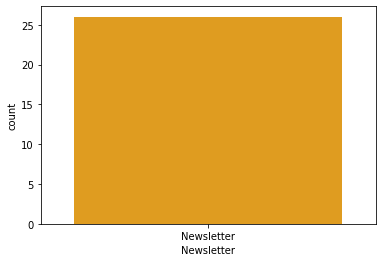

In [86]:
for column in list(df2.drop(columns=['Network ID', 'Start Date (UTC)', 'Submit Date (UTC)', '#', 'Please tell us anything else you think we could do better and improve on in Data and CRM. It would be great if you could focus on the ‘what’ and the ‘how’.']).columns):
    sns.countplot(x=column, data=df2, palette=['orange'])

In [53]:
df3 = df2.groupby(['On a scale of 1 -10 (10 being great), how do you feel about your work today?'])['On a scale of 1 -10 (10 being great), how do you feel about your work today?'].count()

In [45]:
df3

On a scale of 1 -10 (10 being great), how do you feel about your work today?
1      2
2      1
5      3
6      7
7     10
8     10
9      4
10     2
Name: On a scale of 1 -10 (10 being great), how do you feel about your work today?, dtype: int64

In [39]:
df3 = df3.reset_index()

In [43]:
df3.iloc[:, 1]

0     2
1     1
2     3
3     7
4    10
5    10
6     4
7     2
Name: #, dtype: int64

In [8]:
import plotly.express as px

In [ ]:
def counter_survey(column_name, df):
    df = df.groupby([column_name])[column_name].count()
    df = df.reset_index()
    fig = px.bar(df, x='index', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
    fig.show()